In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pandas as pd
 


In [4]:
iris = datasets.load_iris()
print(iris.target_names)#prints output columns(classes)
print(iris.feature_names) # prints feature(columns names)
#print(iris.data) prints complete dataset
#print(iris.data[:5])
print(iris.target) # prints all the target variables()
print(iris.target.shape)
data=pd.DataFrame({'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],'species':iris.target })
#print(data.head())

#First, we separate the columns into dependent and independent variables
#(or features and labels). Then you split those variables into a training
#and test set.

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # converting in DF
y=data['species'] # converting into pandas series


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.493503
petal width (cm)     0.403005
sepal length (cm)    0.085260
sepal width (cm)     0.018232
dtype: float64

In [13]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
print(feature_imp)

petal length (cm)    0.486346
petal width (cm)     0.395065
sepal length (cm)    0.102011
sepal width (cm)     0.016578
dtype: float64


No handles with labels found to put in legend.


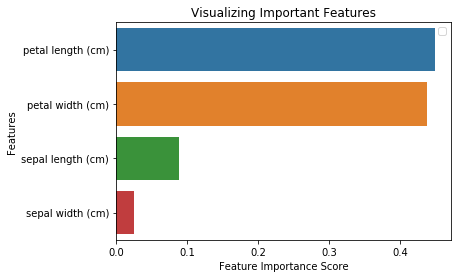

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()